# MultiForest optimization notebook
# NORWAY

Above the code cells, there are short instructions how the users can modify the codes in the cells.<br>
If there are no instructions, no changes should be needed for the cell by default.

A detailed description is provided in the <b>README.md</b>.

## Basic definitions
Simulated forest data - name and climate scenario

In [1]:
RCP = "RCP45" # NDC scenario

Specify policy scenario:

- "FS" -  National Forest Strategy
- "BDS" - Biodiversity Strategy
- "BES" - Bioeconomy Strategy

In [2]:
scenario ="BES"

## Read .py class & data

In [3]:
import wget
import os
import numpy as np
import pandas as pd
import sys

In [4]:
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path+"/py_class")

import multiFunctionalOptimization as MFO

In [5]:
from importlib import reload
reload(MFO)

<module 'multiFunctionalOptimization' from '/run/user/1041/gvfs/smb-share:server=int.nibio.no,share=prosjekt/Aktive/DSU/3434/51238_MultiForest/WP2/Repository/MultiForestDemonstration/NatPolicyAnalysis_NOR/multiFunctionalOptimization.py'>

In [6]:
mfo = MFO.MultiFunctionalOptimization()

'Using CLP'

<b>You need to "unrar" the file testData.rar first</b>

In [7]:
pip install patool

In [8]:
import patoolib
patoolib.extract_archive("../NatPolicyAnalysis_NOR/testData.rar")
filename = "testData.csv"
filename

'testData.csv'

In [9]:
%%time
mfo.readData(filename,standsEnu = "plot_id",delimeter = ",",
             areaCol = "tsd_ha2total", 
             sampleRatio=0.3) #If no sample ratio given, the ratio is assumed to be 1
                             #0.2 means 20% of the data

'sample size 581/1938(29%)'

CPU times: user 1.09 s, sys: 634 ms, total: 1.73 s
Wall time: 2.93 s


In [10]:
mfo.data.columns

Index(['plot_id', 'year', 'regime', 'period', 'pulp_vol_m3',
       'harv_cost_nok_m3', 'harv_cost_u150', 'harv_cost_u200',
       'net_increment_m3', 'is_old', 'is_broadleave', 'MiS_classified_plot',
       'bilberry_cover_pr', 'GROT_kt_TotNor', 'vol_saw_m3', 'saw_CO2_t',
       'vol_panels_m3', 'panels_CO2_t', 'albedo', 'is_steep_terrain',
       'is_vernskog', 'is_city_forest', 'shan', 'class_dbh', 'ha2total',
       'management', 'harv_net_Mnok_TotNor', 'harv_vol_Mm3_TotNor',
       'saw_vol_Mm3_TotNor', 'pulp_vol_Mm3_TotNor', 'dead_vol_Mm3_TotNor',
       'tsd_ha2total', 'CO2_forest_Mil_Kt_TotNor',
       'CO2_forest_Mil_Kt_TotNor_no_albedo', 'saw_CO2_change_Kt_TotNor',
       'saw_CO2_Kt_TotNor', 'panels_CO2_change_Kt_TotNor', 'HWP_C02_TotNor',
       'Bilberry_ha_TotNor', 'MiS_ha', 'SawTimber_Mm3_year', 'pulp_Mm3_year',
       'GROT_t', 'GROT_m3', 'GROT_Mm3', 'Residues_Mm3_year',
       'harvest_demands_Mm3_year', 'regime.class', 'finalFelling', 'is_CCF',
       'is_nomanagement

## Create new columns

In [11]:
mfo.data["GROT_u150"] = (mfo.data["GROT_kt_TotNor"].values)*mfo.data["harv_cost_u150"].values

In [12]:
mfo.data["MIS_area"] = (mfo.data["MiS_classified_plot"].values)*mfo.data["tsd_ha2total"].values/1000

In [13]:
mfo.data["bilberry_cover"] = (mfo.data)["bilberry_cover_pr"].values/100*mfo.data["tsd_ha2total"].values

In [14]:
mfo.finalizeData(initialTime = 2023)

In [15]:
mfo.initialData.head()

period    pulp_vol_m3  harv_cost_nok_m3  \
plot_id  year regime                                                            
A03189-0 2023 SimOpt_extensive_0          t1       0.000000          0.000000   
              SimOpt_extensive_long_0     t1       0.000000          0.000000   
              SimOpt_int_0                t1       0.000000          0.000000   
              SimOpt_int_short_0          t1  124010.473495        215.702789   
              SimOpt_multispecies_0       t1       0.000000          0.000000   

                                       harv_cost_u150  harv_cost_u200  \
plot_id  year regime                                                    
A03189-0 2023 SimOpt_extensive_0                    0               0   
              SimOpt_extensive_long_0               0               0   
              SimOpt_int_0                          0               0   
              SimOpt_int_short_0                    0               0   
              SimOpt_multispecies_0                 0               0   

                                       net_increment_m3  is_old  \
plot_id  year regime                                              
A03189-0 2023 SimOpt_extensive_0            9987.605883       0   
              SimOpt_extensive_long_0       9987.605883       0   
              SimOpt_int_0                  9987.605883       0   
              SimOpt_int_short_0            5373.560798       0   
              SimOpt_multispecies_0         9987.605883       0   

                                       is_broadleave  MiS_classified_plot  \
plot_id  year regime                                                        
A03189-0 2023 SimOpt_extensive_0                   0                    0   
              SimOpt_extensive_long_0              0                    0   
              SimOpt_int_0                         0                    0   
              SimOpt_int_short_0                   0                    0   
              SimOpt_multispecies_0                0                    0   

                                       bilberry_cover_pr  ...  \
plot_id  year regime                                      ...   
A03189-0 2023 SimOpt_extensive_0                      10  ...   
              SimOpt_extensive_long_0                 10  ...   
              SimOpt_int_0                            10  ...   
              SimOpt_int_short_0                       6  ...   
              SimOpt_multispecies_0                   10  ...   

                                       Relative_dead_vol_Mm3_TotNor  \
plot_id  year regime                                                  
A03189-0 2023 SimOpt_extensive_0                           0.001162   
              SimOpt_extensive_long_0                      0.001162   
              SimOpt_int_0                                 0.001162   
              SimOpt_int_short_0                           0.001111   
              SimOpt_multispecies_0                        0.001162   

                                       Relative_tsd_ha2total  \
plot_id  year regime                                           
A03189-0 2023 SimOpt_extensive_0                    0.000533   
              SimOpt_extensive_long_0               0.000533   
              SimOpt_int_0                          0.000533   
              SimOpt_int_short_0                    0.000533   
              SimOpt_multispecies_0                 0.000533   

                                       Relative_CO2_forest_Mil_Kt_TotNor  \
plot_id  year regime                                                       
A03189-0 2023 SimOpt_extensive_0                                0.001871   
              SimOpt_extensive_long_0                           0.001871   
              SimOpt_int_0                                      0.001871   
              SimOpt_int_short_0                               -0.014930   
              SimOpt_multispecies_0                             0.001871   

            

## Objectives

In [16]:

Wood_production =  {
    "harvest_netvalue_Mnok_min": ["netvalue (Millions nok/m2)", "harv_net_Mnok_TotNor", 
                                  "max","average","areaWeightedSum"],
    
    "Sum_harvested_V": ["netvalue (Millions nok/m2)","harv_vol_Mm3_TotNor",
                        "max","average","areaWeightedSum"] 
}


In [17]:

Bioenergy = {
    
     "SUM_GROT_u150": ["GROT (KiloTons)","GROT_u150", 
                       "max","min","areaWeightedSum"],
   
}

In [18]:

Biodiversity = {
    "SUM_MIS":["MIS area","MIS_area", 
               "max","average","areaWeightedSum"],
    
    "blueberryMaxMin":["MaxMin in area of blueberry cover (max)","bilberry_cover",
                       "max","average","areaWeightedSum"],
    
    "SUM_deadwood":["Deadwood","dead_vol_Mm3_TotNor",
                    "max","min","areaWeightedSum"],
}

In [19]:

Climate_regulation = {
    "Sum_CO2_HWP_kt": ["Co2 storage in wooden products","HWP_C02_TotNor",
                       "max","min","areaWeightedSum"],
    
    "Sum_CO2_in_forest": ["Co2 uptake in forest","CO2_forest_Mil_Kt_TotNor", 
                          "max","min","areaWeightedSum"],
}

In [20]:

Erosion_and_water = {
    "harvested_in_vernskog_or_steep": ["verskog ha","is_vers_or_ste", 
                                      "max","min","areaWeightedSum"],
}

In [21]:

Recreation = {
      "harvest_in_cityForest": ["harvest in city forest", "FinaL_city",
                                "max", "average", "areaWeightedSum"],
    
      "SUM_Shannon":["Shannon index", "shan",
                     "max", "average","sum"],
    
    
}

In [22]:
objectives = {
    **Wood_production,
    **Bioenergy,
    **Biodiversity,
    **Climate_regulation,
    **Recreation,
    **Erosion_and_water
}

In [23]:
objectives

{'harvest_netvalue_Mnok_min': ['netvalue (Millions nok/m2)',
  'harv_net_Mnok_TotNor',
  'max',
  'average',
  'areaWeightedSum'],
 'Sum_harvested_V': ['netvalue (Millions nok/m2)',
  'harv_vol_Mm3_TotNor',
  'max',
  'average',
  'areaWeightedSum'],
 'SUM_GROT_u150': ['GROT (KiloTons)',
  'GROT_u150',
  'max',
  'min',
  'areaWeightedSum'],
 'SUM_MIS': ['MIS area', 'MIS_area', 'max', 'average', 'areaWeightedSum'],
 'blueberryMaxMin': ['MaxMin in area of blueberry cover (max)',
  'bilberry_cover',
  'max',
  'average',
  'areaWeightedSum'],
 'SUM_deadwood': ['Deadwood',
  'dead_vol_Mm3_TotNor',
  'max',
  'min',
  'areaWeightedSum'],
 'Sum_CO2_HWP_kt': ['Co2 storage in wooden products',
  'HWP_C02_TotNor',
  'max',
  'min',
  'areaWeightedSum'],
 'Sum_CO2_in_forest': ['Co2 uptake in forest',
  'CO2_forest_Mil_Kt_TotNor',
  'max',
  'min',
  'areaWeightedSum'],
 'harvest_in_cityForest': ['harvest in city forest',
  'FinaL_city',
  'max',
  'average',
  'areaWeightedSum'],
 'SUM_Shannon'

In [24]:
len(objectives)

11

## Define Enabled Constrains

In [25]:
mfo.defineObjectives(objectives)

'Defining objectives'

'Aggregating stand wise'

100%|██████████| 11/11 [00:17<00:00,  1.55s/it]


'Aggregating year wise'

100%|██████████| 11/11 [00:00<00:00, 9505.02it/s]


'Objectives added'

## Calculate objective ranges

You can run the following function twice to improve ranges accuracy.

Especially, if some objectives get as lowerbounds 0:s, then it makes sense to reoptimize

In [26]:
%%time
mfo.calculateObjectiveRanges(debug=True)

'Calculating objective ranges'

  0%|          | 0/11 [00:00<?, ?it/s]

'Optimizing for netvalue (Millions nok/m2)'

'Found an optimal solution in 0 seconds'

'Objective values are:'

'netvalue (Millions nok/m2)'

4278.090263973933

'netvalue (Millions nok/m2)'

22.020473186776428

'GROT (KiloTons)'

0.0

'MIS area'

0.5801947198013355

'MaxMin in area of blueberry cover (max)'

123.26703810105272

'Deadwood'

0.0

'Co2 storage in wooden products'

0.0

'Co2 uptake in forest'

-132.03930614903416

'harvest in city forest'

18.32517266666782

'Shannon index'

882.329178467493

'verskog ha'

0.0

  9%|▉         | 1/11 [00:02<00:22,  2.29s/it]

'Optimizing for netvalue (Millions nok/m2)'

'Found an optimal solution in 0 seconds'

'Objective values are:'

'netvalue (Millions nok/m2)'

2667.0471242607036

'netvalue (Millions nok/m2)'

26.472194682247512

'GROT (KiloTons)'

0.0

'MIS area'

0.539799306625262

'MaxMin in area of blueberry cover (max)'

121.28489054812677

'Deadwood'

0.0

'Co2 storage in wooden products'

0.0

'Co2 uptake in forest'

-183.52044469287682

'harvest in city forest'

23.191857866667995

'Shannon index'

875.91087433342

'verskog ha'

0.0

 18%|█▊        | 2/11 [00:04<00:19,  2.20s/it]

'Optimizing for GROT (KiloTons)'

'Found an optimal solution in 0 seconds'

'Objective values are:'

'netvalue (Millions nok/m2)'

2071.55196745812

'netvalue (Millions nok/m2)'

16.625162347342652

'GROT (KiloTons)'

1818.367363727284

'MIS area'

0.36555044024048067

'MaxMin in area of blueberry cover (max)'

110.42246705149905

'Deadwood'

0.0

'Co2 storage in wooden products'

0.0

'Co2 uptake in forest'

-14.813988924576089

'harvest in city forest'

17.504044711111106

'Shannon index'

694.6003867342946

'verskog ha'

0.0

 27%|██▋       | 3/11 [00:06<00:17,  2.18s/it]

'Optimizing for MIS area'

'Found an optimal solution in 0 seconds'

'Objective values are:'

'netvalue (Millions nok/m2)'

811.3682328124078

'netvalue (Millions nok/m2)'

6.124265131904527

'GROT (KiloTons)'

0.0

'MIS area'

0.7892717292409365

'MaxMin in area of blueberry cover (max)'

124.49595214637826

'Deadwood'

0.0

'Co2 storage in wooden products'

0.0

'Co2 uptake in forest'

0.0

'harvest in city forest'

7.550371688888812

'Shannon index'

1000.591112710675

'verskog ha'

0.0

 36%|███▋      | 4/11 [00:08<00:15,  2.17s/it]

'Optimizing for MaxMin in area of blueberry cover (max)'

'Found an optimal solution in 0 seconds'

'Objective values are:'

'netvalue (Millions nok/m2)'

319.65651301387976

'netvalue (Millions nok/m2)'

1.9793219243713893

'GROT (KiloTons)'

4.3552819647386283e-10

'MIS area'

0.7020616988954119

'MaxMin in area of blueberry cover (max)'

133.7988014367007

'Deadwood'

0.0

'Co2 storage in wooden products'

0.0

'Co2 uptake in forest'

0.0

'harvest in city forest'

1.0614580888845462

'Shannon index'

988.5774039920117

'verskog ha'

0.0

 45%|████▌     | 5/11 [00:10<00:13,  2.18s/it]

'Optimizing for Deadwood'

'Found an optimal solution in 0 seconds'

'Objective values are:'

'netvalue (Millions nok/m2)'

827.8633958517034

'netvalue (Millions nok/m2)'

7.626939012501111

'GROT (KiloTons)'

-1.6339149992292285e-11

'MIS area'

0.6132489856773128

'MaxMin in area of blueberry cover (max)'

127.73188285245631

'Deadwood'

25.30067961291509

'Co2 storage in wooden products'

0.0

'Co2 uptake in forest'

-11.613178342110428

'harvest in city forest'

6.428831066670349

'Shannon index'

926.1469399711341

'verskog ha'

0.0

 55%|█████▍    | 6/11 [00:13<00:11,  2.24s/it]

'Optimizing for Co2 storage in wooden products'

'Found an optimal solution in 0 seconds'

'Objective values are:'

'netvalue (Millions nok/m2)'

1347.657140690688

'netvalue (Millions nok/m2)'

16.198579799824813

'GROT (KiloTons)'

0.0

'MIS area'

0.379641662319998

'MaxMin in area of blueberry cover (max)'

108.69165428867582

'Deadwood'

0.0

'Co2 storage in wooden products'

48935.40767662774

'Co2 uptake in forest'

-66.24460364968333

'harvest in city forest'

19.22641066670999

'Shannon index'

769.5593849341057

'verskog ha'

0.0

 64%|██████▎   | 7/11 [00:15<00:09,  2.27s/it]

'Optimizing for Co2 uptake in forest'

'Found an optimal solution in 1 seconds'

'Objective values are:'

'netvalue (Millions nok/m2)'

286.02535927991016

'netvalue (Millions nok/m2)'

2.3000419751193566

'GROT (KiloTons)'

0.0

'MIS area'

0.6692904607645227

'MaxMin in area of blueberry cover (max)'

128.5246575990827

'Deadwood'

0.0

'Co2 storage in wooden products'

0.0

'Co2 uptake in forest'

35.019587215041994

'harvest in city forest'

3.2071043868471816

'Shannon index'

1017.5997477135495

'verskog ha'

0.0

 73%|███████▎  | 8/11 [00:18<00:07,  2.37s/it]

'Optimizing for harvest in city forest'

'Found an optimal solution in 0 seconds'

'Objective values are:'

'netvalue (Millions nok/m2)'

1528.118464716663

'netvalue (Millions nok/m2)'

14.585489629996564

'GROT (KiloTons)'

0.0

'MIS area'

0.3597186688211526

'MaxMin in area of blueberry cover (max)'

110.09910551974677

'Deadwood'

0.0

'Co2 storage in wooden products'

0.0

'Co2 uptake in forest'

-16.511794934350743

'harvest in city forest'

23.7926832

'Shannon index'

678.988123171016

'verskog ha'

0.0

 82%|████████▏ | 9/11 [00:20<00:04,  2.29s/it]

'Optimizing for Shannon index'

'Found an optimal solution in 0 seconds'

'Objective values are:'

'netvalue (Millions nok/m2)'

747.3742777510344

'netvalue (Millions nok/m2)'

6.4130813508172455

'GROT (KiloTons)'

0.0

'MIS area'

0.543127248826047

'MaxMin in area of blueberry cover (max)'

121.15509854593446

'Deadwood'

0.0

'Co2 storage in wooden products'

0.0

'Co2 uptake in forest'

0.0

'harvest in city forest'

6.16847342222416

'Shannon index'

1230.023132514068

'verskog ha'

0.0

 91%|█████████ | 10/11 [00:22<00:02,  2.26s/it]

'Optimizing for verskog ha'

'Found an optimal solution in 0 seconds'

'Objective values are:'

'netvalue (Millions nok/m2)'

1245.1422679264942

'netvalue (Millions nok/m2)'

12.664434892678889

'GROT (KiloTons)'

0.0

'MIS area'

0.37301938520704936

'MaxMin in area of blueberry cover (max)'

111.29487042658525

'Deadwood'

0.0

'Co2 storage in wooden products'

0.0

'Co2 uptake in forest'

-18.21882367105482

'harvest in city forest'

13.258212355555555

'Shannon index'

699.4607266391079

'verskog ha'

650.809522000001

100%|██████████| 11/11 [00:24<00:00,  2.25s/it]
CPU times: user 12.5 s, sys: 2.37 s, total: 14.8 s
Wall time: 24.7 s


In [27]:
mfo.objectiveRanges

{'harvest_netvalue_Mnok_min': (286.02535927991016, 4278.090263973933),
 'Sum_harvested_V': (1.9793219243713893, 26.472194682247512),
 'SUM_GROT_u150': (-1.6339149992292285e-11, 1818.367363727284),
 'SUM_MIS': (0.3597186688211526, 0.7892717292409365),
 'blueberryMaxMin': (108.69165428867582, 133.7988014367007),
 'SUM_deadwood': (0.0, 25.30067961291509),
 'Sum_CO2_HWP_kt': (0.0, 48935.40767662774),
 'Sum_CO2_in_forest': (-183.52044469287682, 35.019587215041994),
 'harvest_in_cityForest': (1.0614580888845462, 23.7926832),
 'SUM_Shannon': (678.988123171016, 1230.023132514068),
 'harvested_in_vernskog_or_steep': (0.0, 650.809522000001)}

## Define the ecosytem service categories

In [28]:
ESS = {'wood_production':Wood_production,
       'bioenergy':Bioenergy,
       'biodiversity':Biodiversity,
       'climate_regulation':Climate_regulation,
       'recreation':Recreation,
       'water':Erosion_and_water
      }

## Define how solutions by ESS are going to be aggregated

In [29]:
AGG = {'wood_production':"AVG",
       'bioenergy':"AVG",
       'biodiversity':"MIN",
       'climate_regulation':"AVG",
       'recreation':"MIN",
       'water':"AVG"}

## Ideal and anti-ideal value obtainable for each ESS category

In [30]:
mfo.addEyvindsonMultifunctionality(ESS,AGG)

'Calculating objective ranges'

  0%|          | 0/6 [00:00<?, ?it/s]wood_production


'Found an optimal solution in 0 seconds'

'Objective values are:'

MFwood_production

0.931541896813408

MFbioenergy

8.985615513248209e-15

MFbiodiversity

0.0

MFclimate_regulation

0.07782854418021468

MFrecreation

0.0

MFwater

0.9999999999999987

 17%|█▋        | 1/6 [00:02<00:11,  2.26s/it]bioenergy


'Found an optimal solution in 0 seconds'

'Objective values are:'

MFwood_production

0.5264064947638318

MFbioenergy

0.9999999999999999

MFbiodiversity

0.0

MFclimate_regulation

0.3843191676812437

MFrecreation

-0.03769394127927739

MFwater

0.9999999999999999

 33%|███▎      | 2/6 [00:04<00:08,  2.19s/it]biodiversity


'Found an optimal solution in 1 seconds'

'Objective values are:'

MFwood_production

0.03195093596596888

MFbioenergy

8.985615513248209e-15

MFbiodiversity

0.96484777048539

MFclimate_regulation

0.41987832410082787

MFrecreation

0.0

MFwater

0.9999999999999984

 50%|█████     | 3/6 [00:07<00:07,  2.41s/it]climate_regulation


'Found an optimal solution in 1 seconds'

'Objective values are:'

MFwood_production

0.3070276195857618

MFbioenergy

8.985615513248209e-15

MFbiodiversity

0.0

MFclimate_regulation

0.9140413066047245

MFrecreation

0.0

MFwater

0.999999999999999

 67%|██████▋   | 4/6 [00:09<00:05,  2.54s/it]recreation


'Found an optimal solution in 0 seconds'

'Objective values are:'

MFwood_production

0.2699231823597867

MFbioenergy

8.98561551324821e-15

MFbiodiversity

0.0

MFclimate_regulation

0.3977219340581858

MFrecreation

0.9138674060465242

MFwater

0.9999999999999999

 83%|████████▎ | 5/6 [00:12<00:02,  2.43s/it]water


'Found an optimal solution in 0 seconds'

'Objective values are:'

MFwood_production

0.34941146394210254

MFbioenergy

8.98561551324821e-15

MFbiodiversity

0.0

MFclimate_regulation

0.3834139986714603

MFrecreation

0.0

MFwater

0.9999999999999999

100%|██████████| 6/6 [00:14<00:00,  2.37s/it]


## Maximum multifunctionality

In [31]:
mfo.solveMultifunctionality()

'Found an optimal solution in 1 seconds'

'Objective values are:'

MFwood_production

0.64227522418893

MFbioenergy

0.9341925212717171

MFbiodiversity

0.6251579917445371

MFclimate_regulation

0.6591145307763129

MFrecreation

0.6333696867317651

MFwater

0.9999999999999979

## Visualization of optimal solution


In [32]:
regimeAmounts = {regime:0 for regime in mfo.regimes}
for key in mfo.regimesDecision.keys():
    regimeAmounts[key[1]] +=mfo.regimesDecision[key].solution_value()*mfo.standAreas.loc[key[0],"tsd_ha2total"]/mfo.standAreas["tsd_ha2total"].sum()

In [33]:
%pylab notebook

Populating the interactive namespace from numpy and matplotlib


In [34]:
[val for val in regimeAmounts.values()]

[0.0669251292712029,
 0.21699361030191494,
 0.09868527213963216,
 0.059199588691822465,
 0.04072572049750508,
 0.2618201678989535,
 0.0,
 0.0017927805834429807,
 0.001896660468606087,
 0.0,
 0.0062747320420504325,
 0.004902200008677774,
 0.018784954546625186,
 0.0,
 0.0,
 0.0,
 0.0026891708751644715,
 0.0,
 0.005378341750328943,
 0.0035855611668859618,
 0.0007171122333771926,
 0.0,
 0.0006823635137437982,
 0.022409757293037263,
 0.0017927805834429809,
 0.001149731681839317,
 0.002435829485046645,
 0.004160961720398085,
 0.01861619799556371,
 0.010258090905151106,
 0.005921035358925351,
 0.0008963902917214907,
 0.0,
 0.0,
 0.0,
 0.002903197653142165,
 0.0017927805834429809,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0035855611668859618,
 0.0008847805868191126,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0018331303286774428,
 0.0028657233178427935,
 0.0,
 0.0,
 0.0017927805834429809,
 0.0023654900882742105,
 0.004886560726744184,
 0.0017118521021965098,
 0.0,
 0.0,
 0.0,
 0.004305399015928938,
 0.0,
 0.00114214015

<IPython.core.display.Javascript object>


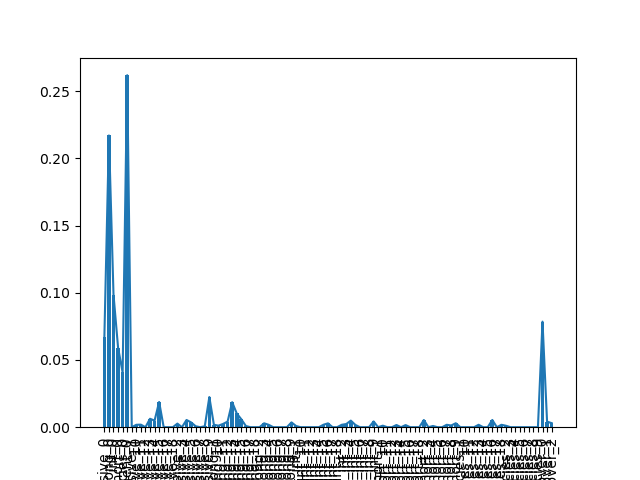

In [35]:
plt.plot([key for key in regimeAmounts.keys()],[val for val in regimeAmounts.values()])

In [36]:
plt.bar(range(len(regimeAmounts)), list(regimeAmounts.values()), align='center')
plt.xticks(range(len(regimeAmounts)), list(regimeAmounts.keys()),rotation="vertical")

([<matplotlib.axis.XTick at 0x7fe3c63d2b50>,
 <a list of 99 Text xticklabel objects>)

## Export data as csv
- Solution_alldata contains the optimal regime per stand AND the timely development of indicator values plus all other input columns (represented_are_by_NFIplot, region, NUTS2)
- Solution contains only the selected optimal regime and its share (if multiple regimes per stand are selected)

In [ ]:
import pandas as pd
import os

In [36]:
try:
    os.mkdir("results")
except FileExistsError:
    pass
b = []
c = []
for key in mfo.regimesDecision.keys():
    if mfo.regimesDecision[key].solution_value() > 0:
        b = b+ [(key[0],x*5+2012, key[1]) for x in range(0,21)]
        c = c+ [(key[0],key[1],mfo.regimesDecision[key].solution_value())]
data2b = mfo.data.iloc[mfo.data.index.isin(b)]
data2b.to_csv("./results/"+scenario+"_"+RCP+"_data.csv")
c1 = pd.DataFrame(c)
c1.to_csv("./results/"+scenario+"_"+RCP+"_solutions.csv")

## Export objective ranges

Save as json file

In [38]:
import json
mfo.objectiveRanges

with open('./results/objectiveRanges_'+scenario+'_'+RCP+'.json', 'w') as json_file:
  json.dump(mfo.objectiveRanges, json_file)

Save as CSV.

In [39]:
df = pd.read_json('./results/objectiveRanges_'+scenario+'_'+RCP+'.json')

df.to_csv('./results/objectiveRanges_'+scenario+'_'+RCP+'.csv')

## Export objective values
The optimal solution for each objective.

In [40]:
with open("./results/objectiveValues_"+scenario+"_"+RCP+".csv","w") as file:
    delim = ""
    for objName in mfo.objectiveTypes.keys():
        file.write(delim+objName)
        delim = ","
    file.write("\n")
    delim = ""
    for objName in mfo.objectiveTypes.keys():
        file.write(delim+str(mfo.objective[objName].solution_value()))
        delim = ","
    file.write("\n")